In [1]:
import gzip, csv, json
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import random
from random import sample

In [2]:
seed = random.seed(42)


In [3]:
highF = pd.read_csv('./high.csv', sep=',')
highF['label'] = 1

In [4]:
lowF1 = pd.read_csv('./low.csv', sep=',')
lowF1['label']=0
newF = pd.DataFrame()
newF = newF.append(lowF1.sample(n=len(highF), random_state=seed))
newF = newF.append(highF.sample(n=len(highF), random_state=seed))
#lowF = lowF1.sample(frac=len(highF)/len(lowF1))

In [5]:
print newF.head()
print newF.tail()

                   author  num_archived_comm  num_subs  min_score  max_score  \
972          DrudfuCommnt                  0       101        -28        978   
4370              jose371                 78        88        -23        257   
3357              JerfFoo               1336       344       -212       2440   
3530            Kgizzle80                107       170       -133       7216   
6914  744EvergreenTerrace                  0       163        -31        154   

      avg_score   std_score  num_contra_comm  num_gilded_comm  \
972    8.846049   45.113010               11                0   
4370   3.621879   13.183944               11                0   
3357   4.294070   38.122152              645                1   
3530   8.177798  156.266748               57                0   
6914   1.255532    5.181933               23                0   

      num_distinguished_comm  ...    std_replies  num_gilded_posts  \
972                        0  ...       1.258306          

In [6]:

print newF.shape

(9912, 33)


In [7]:
newF = newF.dropna(0)
print newF.shape

print newF.head()
print newF.tail()

(9357, 33)
                   author  num_archived_comm  num_subs  min_score  max_score  \
972          DrudfuCommnt                  0       101        -28        978   
4370              jose371                 78        88        -23        257   
3357              JerfFoo               1336       344       -212       2440   
3530            Kgizzle80                107       170       -133       7216   
6914  744EvergreenTerrace                  0       163        -31        154   

      avg_score   std_score  num_contra_comm  num_gilded_comm  \
972    8.846049   45.113010               11                0   
4370   3.621879   13.183944               11                0   
3357   4.294070   38.122152              645                1   
3530   8.177798  156.266748               57                0   
6914   1.255532    5.181933               23                0   

      num_distinguished_comm  ...    std_replies  num_gilded_posts  \
972                        0  ...       1.25830

In [8]:
# read subreddit cooccurrence and recipricity scores

high_sub_cooc = pd.read_csv('./high_subcooc.csv', header=None, names=['author', 'subcooc'])
low_sub_cooc1 = pd.read_csv('./low_subcooc.csv', header=None, names=['author', 'subcooc'])

hsc_a = high_sub_cooc['author'].tolist()
lsc_a = low_sub_cooc1['author'].tolist()

true_low = list(set(lsc_a).difference(set(hsc_a)))
low_sub_cooc = low_sub_cooc1.loc[low_sub_cooc1['author'].isin(true_low)]

In [9]:
cooc1 = [high_sub_cooc, low_sub_cooc]
cooc = high_sub_cooc.append(low_sub_cooc)
cooc

,author,subcooc
0,Juicy_Brucesky,0.140996
1,jerkedit,0.199324
2,frothface,0.116057
3,tututang,0.067239
4,DeplorableinTX,0.663556
5,armchairCueB,1.513413
6,HD3D,0.369215
7,str8upcoffee,0.051638
8,RealisticFox,0.033009
9,YouShallKnow,0.493390


In [10]:
withWeak = pd.merge(newF, cooc, how='left', on=['author'])
print withWeak.shape

(9357, 34)


In [11]:
high_recip = pd.read_csv('./high_reciprocity.csv', header=None, names=['author', 'reciprocity'])
low_recip1 = pd.read_csv('./low_reciprocity.csv', header=None, names=['author', 'reciprocity'])

hrc_a = high_recip['author'].tolist()
lrc_a = low_recip1['author'].tolist()

true_lowr = list(set(lrc_a).difference(set(hrc_a)))
low_recip = low_recip1.loc[low_recip1['author'].isin(true_lowr)]

recp1 = [high_recip, low_recip]
recp = pd.concat(recp1)
print recp.shape
withStrong = pd.merge(newF, recp, how='left', on=['author'])
withBonds = pd.merge(withWeak, recp, how='left', on=['author'])

(13789, 2)


In [12]:
withBonds = withBonds.dropna(0)
print withBonds.shape

(6398, 35)


In [13]:
print withBonds.head()
print withBonds.tail()

                author  num_archived_comm  num_subs  min_score  max_score  \
0         DrudfuCommnt                  0       101        -28        978   
1              jose371                 78        88        -23        257   
2              JerfFoo               1336       344       -212       2440   
3            Kgizzle80                107       170       -133       7216   
4  744EvergreenTerrace                  0       163        -31        154   

   avg_score   std_score  num_contra_comm  num_gilded_comm  \
0   8.846049   45.113010               11                0   
1   3.621879   13.183944               11                0   
2   4.294070   38.122152              645                1   
3   8.177798  156.266748               57                0   
4   1.255532    5.181933               23                0   

   num_distinguished_comm     ...       num_distinguished_posts  num_posts  \
0                       0     ...                             0          4   
1       

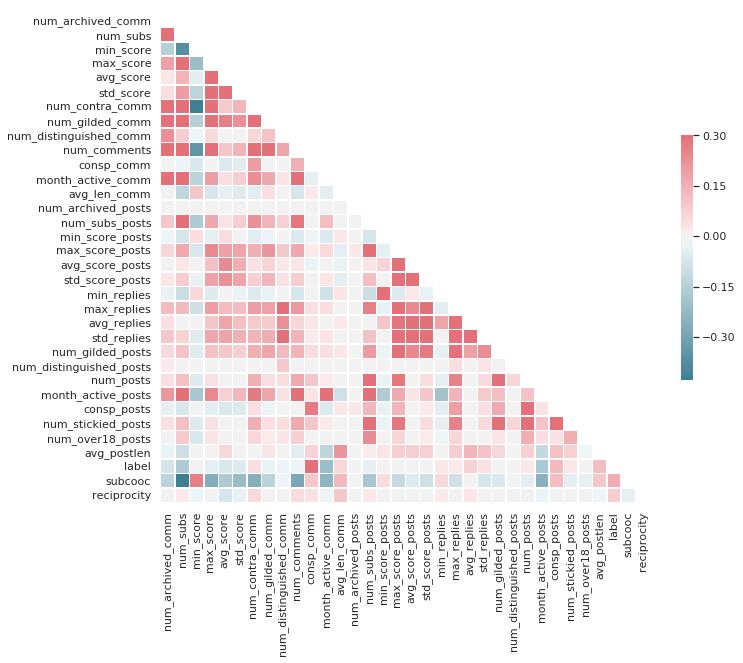

In [14]:
corr = withBonds.corr()


from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
#d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 #columns=list(ascii_letters[26:]))

# Compute the correlation matrix
#corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [15]:
print list(withBonds)

['author', 'num_archived_comm', 'num_subs', 'min_score', 'max_score', 'avg_score', 'std_score', 'num_contra_comm', 'num_gilded_comm', 'num_distinguished_comm', 'num_comments', 'consp_comm', 'month_active_comm', 'avg_len_comm', 'num_archived_posts', 'num_subs_posts', 'min_score_posts', 'max_score_posts', 'avg_score_posts', 'std_score_posts', 'min_replies', 'max_replies', 'avg_replies', 'std_replies', 'num_gilded_posts', 'num_distinguished_posts', 'num_posts', 'month_active_posts', 'consp_posts', 'num_stickied_posts', 'num_over18_posts', 'avg_postlen', 'label', 'subcooc', 'reciprocity']


In [16]:

fields = ['avg_score', 
          'num_contra_comm', 'num_gilded_comm', 'num_distinguished_comm', 'consp_comm', 
          'avg_len_comm',  
          'avg_score_posts', 'avg_replies', 
          'num_gilded_posts', 'num_distinguished_posts',
          'consp_posts', 
          'avg_postlen', 'subcooc', 'reciprocity']

fields_wbonds = ['avg_score', 
          'num_contra_comm', 'num_gilded_comm', 'num_distinguished_comm', 'consp_comm', 
          'avg_len_comm',  
          'avg_score_posts', 'avg_replies', 
          'num_gilded_posts', 'num_distinguished_posts',
          'consp_posts', 
          'avg_postlen']

norm_fields = ['avg_score', 
          'num_contra_comm', 'num_gilded_comm', 'num_distinguished_comm', 'consp_comm', 
          'avg_len_comm',  
          'avg_score_posts', 'avg_replies', 
          'num_gilded_posts', 'num_distinguished_posts',
          'consp_posts', 
          'avg_postlen', 'subcooc', 'reciprocity']



coms_dmonth = ['num_archived_comm',
 'num_subs',
 'num_contra_comm',
 'num_gilded_comm',
 'num_distinguished_comm',
 'num_comments']

posts_dmonth=[
 'num_archived_posts',
 'num_subs_posts',
 'num_gilded_posts',
 'num_distinguished_posts',
 'num_posts',
 'num_stickied_posts',
 'num_over18_posts',
         ]


#for field in coms_dmonth:
#    withBonds[field] = withBonds[field].div(withBonds.month_active_comm, axis=0)
    
#for field in posts_dmonth:
#    withBonds[field] = withBonds[field].div(withBonds.month_active_posts, axis=0)
    

#newF = newF.dropna()
    
from sklearn import preprocessing
#newF = newF.dropna()
vnewF = pd.DataFrame()
for field in norm_fields:
    x = withBonds[[field]].values.astype(float)

    # Create a minimum and maximum processor object
    min_max_scaler = preprocessing.StandardScaler()

    # Create an object to transform the data to fit minmax processor
    x_scaled = min_max_scaler.fit_transform(x)
    print type(x_scaled)
    # Run the normalizer on the dataframe
    #newF[field] = pd.DataFrame(x_scaled.T)
    withBonds[field] = x_scaled


<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>


In [17]:
withBonds.head()

,author,num_archived_comm,num_subs,min_score,max_score,avg_score,std_score,num_contra_comm,num_gilded_comm,num_distinguished_comm,...,num_distinguished_posts,num_posts,month_active_posts,consp_posts,num_stickied_posts,num_over18_posts,avg_postlen,label,subcooc,reciprocity
0,DrudfuCommnt,0,101,-28,978,0.416738,45.113010,-0.493902,-0.231813,-0.034367,...,-0.020322,4,7.226950,-0.215506,4,1,-0.631312,0,-0.782264,0.501789
1,jose371,78,88,-23,257,-0.491576,13.183944,-0.493902,-0.231813,-0.034367,...,-0.020322,11,11.939819,-0.200052,11,0,-0.789334,0,-0.806578,-0.918234
2,JerfFoo,1336,344,-212,2440,-0.374704,38.122152,2.826933,0.098508,-0.034367,...,-0.020322,80,23.502162,-0.215506,80,1,1.238196,0,-0.880949,1.065622
3,Kgizzle80,107,170,-133,7216,0.300551,156.266748,-0.252958,-0.231813,-0.034367,...,-0.020322,55,23.395095,-0.215506,55,4,-1.266985,0,-0.895377,2.005343
4,744EvergreenTerrace,0,163,-31,154,-0.903008,5.181933,-0.431047,-0.231813,-0.034367,...,0.020527,781,16.883605,-0.045516,781,7,-0.417534,0,-0.482023,0.752381


withBonds.to_csv('./features_withbonds.csv')

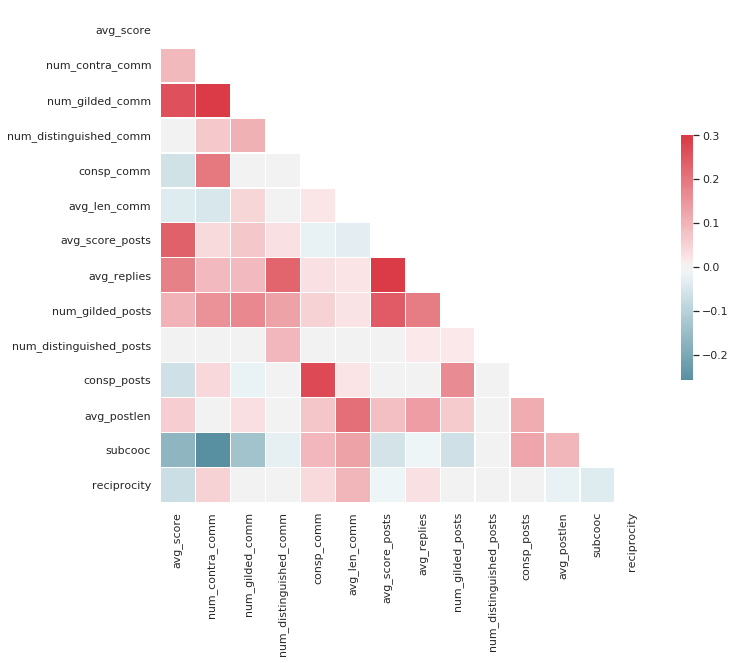

In [18]:
corr = withBonds[fields].corr()


from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
#d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 #columns=list(ascii_letters[26:]))

# Compute the correlation matrix
#corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
linreg = LinearRegression(normalize=True)
linreg.fit(withBonds[fields],withBonds['label'])
y_pred = linreg.predict(withBonds[fields])

In [21]:
score = linreg.score(withBonds[fields], withBonds['label'])
print score
rss = sum((y_pred-withBonds['label'])**2)
print rss
ret = [rss]
ret.extend([linreg.intercept_])
ret.extend(linreg.coef_)


0.133402212213
1298.78492259


In [22]:
from sklearn.linear_model import RidgeClassifier
clf = RidgeClassifier().fit(withBonds[fields_wbonds],withBonds['label'])
clf.score(withBonds[fields_wbonds],withBonds['label']) 

0.66130040637699283

In [23]:
from sklearn.linear_model import RidgeClassifier
clf = RidgeClassifier().fit(withBonds[fields],withBonds['label'])
clf.score(withBonds[fields],withBonds['label']) 

0.69084088777743047

In [24]:
import random

#To ensure the plots are inline i.e. under the block of code executing the plot
%matplotlib inline

#Set a seed that will be used throughout the code

alpha = 0
#Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier_logistic = LogisticRegression(random_state=seed)

#K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier
classifier_KNN = KNeighborsClassifier()

#Kernel SVM
from sklearn.svm import SVC
classifier_SVC = SVC(random_state=seed)

#Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier_NB = GaussianNB()

#Decision Tree
from sklearn.tree import DecisionTreeClassifier
classifier_DT = DecisionTreeClassifier(criterion = "entropy", random_state=seed)

#Random Forest
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(n_estimators = 100, criterion = "entropy", random_state=seed)

#Ridge Regression
from sklearn.linear_model import Ridge
alpha=0.5
classifier_ridge = Ridge(alpha=alpha,normalize=True)

#Lasso Regression
from sklearn.linear_model import Lasso
classifier_lasso = Lasso(alpha=alpha,normalize=True)

In [41]:
from sklearn.model_selection import cross_val_score
scorer = ['accuracy', 'f1', 'precision', 'recall']

for score in scorer:
    #Logistic Regression
    accuracies_logistic = cross_val_score(estimator = classifier_logistic, X = withBonds[fields], y = withBonds['label'], cv = 5, scoring='%s' % score)

    #K-Nearest Neighbours
    accuracies_KNN = cross_val_score(estimator = classifier_KNN, X = withBonds[fields], y = withBonds['label'], cv = 5, scoring='%s' % score)

    #Naive Bayes
    accuracies_NB = cross_val_score(estimator = classifier_NB, X = withBonds[fields], y = withBonds['label'], cv = 5, scoring='%s' % score)

    #Decision Tree, scoring=
    accuracies_DT = cross_val_score(estimator = classifier_DT, X = withBonds[fields], y = withBonds['label'], cv = 5, scoring='%s' % score)

    #Random Forest
    accuracies_RF = cross_val_score(estimator = classifier_RF, X = withBonds[fields], y = withBonds['label'], cv = 10, scoring='%s' % score)
    #Ridge Regression
    #accuracies_ridge = cross_val_score(estimator = classifier_ridge, X = withBonds[fields], y = withBonds['label'], cv = 5)
    #Lasso Regression
    #accuracies_lasso = cross_val_score(estimator = classifier_lasso, X = withBonds[fields], y = withBonds['label'], cv = 5)
    print("The  for Logistic Regression is: ",score, accuracies_logistic.mean() )

    print("The  for K-Nearest Neighbours is: ",score, accuracies_KNN.mean() )

    print("The  for Naive Bayes is: ", score, accuracies_NB.mean() )

    print("The  for Decision Tree is: ", score, accuracies_DT.mean() )

    print("The  for Random Forest is: ", score, accuracies_RF.mean() )

    print "---------------------------------------------------------------------"

('The accuracy for Logistic Regression is:', 0.83510453459444245)
('The accuracy for K-Nearest Neighbours is:', 0.69459494327617999)
('The accuracy for Naive Bayes is:', 0.71551927035554219)
('The accuracy for Decision Tree is:', 0.78727736268759929)
('The accuracy for Random Forest is:', 0.84103784928979319)
---------------------------------------------------------------------
('The accuracy for Logistic Regression is:', 0.86515338410041043)
('The accuracy for K-Nearest Neighbours is:', 0.75910682217405034)
('The accuracy for Naive Bayes is:', 0.71895418919821297)
('The accuracy for Decision Tree is:', 0.82999890575366186)
('The accuracy for Random Forest is:', 0.87427847631858635)
---------------------------------------------------------------------
('The accuracy for Logistic Regression is:', 0.88578836854848286)
('The accuracy for K-Nearest Neighbours is:', 0.74919555375537972)
('The accuracy for Naive Bayes is:', 0.9344681603861249)
('The accuracy for Decision Tree is:', 0.8273690

In [26]:
print("The accuracy for Logistic Regression is:",accuracies_logistic.mean())

print("The accuracy for K-Nearest Neighbours is:",accuracies_KNN.mean())

print("The accuracy for Naive Bayes is:",accuracies_NB.mean())

print("The accuracy for Decision Tree is:",accuracies_DT.mean())

print("The accuracy for Random Forest is:",accuracies_RF.mean())

#print("The accuracy for Ridge Regression is:",accuracies_ridge.mean())

#print("The accuracy for Lasso Regression is:",accuracies_lasso.mean())

('The accuracy for Logistic Regression is:', 0.83510453459444245)
('The accuracy for K-Nearest Neighbours is:', 0.69459494327617999)
('The accuracy for Naive Bayes is:', 0.71551927035554219)
('The accuracy for Decision Tree is:', 0.78368202415132093)
('The accuracy for Random Forest is:', 0.83759668221235883)


In [43]:
from sklearn.model_selection import cross_val_score

for score in scorer:
    #Logistic Regression
    accuracies_logistic = cross_val_score(estimator = classifier_logistic, X = withBonds[fields_wbonds], y = withBonds['label'], cv = 5, scoring='%s' % score)

    #K-Nearest Neighbours
    accuracies_KNN = cross_val_score(estimator = classifier_KNN, X = withBonds[fields_wbonds], y = withBonds['label'], cv = 5, scoring='%s' % score)

    #Naive Bayes
    accuracies_NB = cross_val_score(estimator = classifier_NB, X = withBonds[fields_wbonds], y = withBonds['label'], cv = 5, scoring='%s' % score)

    #Decision Tree, scoring=
    accuracies_DT = cross_val_score(estimator = classifier_DT, X = withBonds[fields_wbonds], y = withBonds['label'], cv = 5, scoring='%s' % score)

    #Random Forest
    accuracies_RF = cross_val_score(estimator = classifier_RF, X = withBonds[fields_wbonds], y = withBonds['label'], cv = 10, scoring='%s' % score)
    #Ridge Regression
    #accuracies_ridge = cross_val_score(estimator = classifier_ridge, X = withBonds[fields], y = withBonds['label'], cv = 5)
    #Lasso Regression
    #accuracies_lasso = cross_val_score(estimator = classifier_lasso, X = withBonds[fields], y = withBonds['label'], cv = 5)
    print("The  for Logistic Regression is: ",score, accuracies_logistic.mean() )

    print("The  for K-Nearest Neighbours is: ",score, accuracies_KNN.mean() )

    print("The  for Naive Bayes is: ", score, accuracies_NB.mean() )

    print("The  for Decision Tree is: ", score, accuracies_DT.mean() )

    print("The  for Random Forest is: ", score, accuracies_RF.mean() )

    print "---------------------------------------------------------------------"

('The {} for Logistic Regression is: {}', 'accuracy', 0.82744620625073628)
('The {} for K-Nearest Neighbours is: {}', 'accuracy', 0.71600291446863684)
('The {} for Naive Bayes is: {}', 'accuracy', 0.7128603330904133)
('The {} for Decision Tree is: {}', 'accuracy', 0.77992945981488637)
('The {} for Random Forest is: {}', 'accuracy', 0.83822558999777841)
---------------------------------------------------------------------
('The {} for Logistic Regression is: {}', 'f1', 0.85871255483890718)
('The {} for K-Nearest Neighbours is: {}', 'f1', 0.77369471336008577)
('The {} for Naive Bayes is: {}', 'f1', 0.71318792646948226)
('The {} for Decision Tree is: {}', 'f1', 0.82481658650117962)
('The {} for Random Forest is: {}', 'f1', 0.87535863500830435)
---------------------------------------------------------------------
('The {} for Logistic Regression is: {}', 'precision', 0.88020357957994144)
('The {} for K-Nearest Neighbours is: {}', 'precision', 0.77140946840109947)
('The {} for Naive Bayes i

In [28]:
print("The accuracy for Logistic Regression is:",accuracies_logistic.mean())

print("The accuracy for K-Nearest Neighbours is:",accuracies_KNN.mean())

print("The accuracy for Naive Bayes is:",accuracies_NB.mean())

print("The accuracy for Decision Tree is:",accuracies_DT.mean())

print("The accuracy for Random Forest is:",accuracies_RF.mean())

#print("The accuracy for Ridge Regression is:",accuracies_ridge.mean())

#print("The accuracy for Lasso Regression is:",accuracies_lasso.mean())

('The accuracy for Logistic Regression is:', 0.82744620625073628)
('The accuracy for K-Nearest Neighbours is:', 0.71600291446863684)
('The accuracy for Naive Bayes is:', 0.7128603330904133)
('The accuracy for Decision Tree is:', 0.78290114007637945)
('The accuracy for Random Forest is:', 0.83354252096864079)


In [29]:
#Independent variables
X = withBonds[fields]
print X.head()
#Dependent variables
y = withBonds['label']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, shuffle=True)

   avg_score  num_contra_comm  num_gilded_comm  num_distinguished_comm  \
0   0.416738        -0.493902        -0.231813               -0.034367   
1  -0.491576        -0.493902        -0.231813               -0.034367   
2  -0.374704         2.826933         0.098508               -0.034367   
3   0.300551        -0.252958        -0.231813               -0.034367   
4  -0.903008        -0.431047        -0.231813               -0.034367   

   consp_comm  avg_len_comm  avg_score_posts  avg_replies  num_gilded_posts  \
0   -0.491590     -0.930387        -0.305230    -0.633646         -0.176846   
1   -0.355264     -0.812945        -0.289174    -0.337311         -0.176846   
2   -0.458803      1.488935        -0.207031     0.568428         -0.176846   
3   -0.489865     -1.054022        -0.246539    -0.296179         -0.176846   
4   -0.460528     -0.885367        -0.296496    -0.444432         -0.176846   

   num_distinguished_posts  consp_posts  avg_postlen   subcooc  reciprocity  
0 

In [30]:
classifier_RF1 = LogisticRegression(random_state=seed)

classifier_RF1.fit(X_train, y_train)
rf_predict = classifier_RF1.predict(X_test)
#fi = classifier_RF1.feature_importances_
#classifier_RF.score(withBonds[fields], withBonds['label'])
#for i in range(len(fi)):
#    print fields[i], fi[i]

In [31]:
X_train = X_train.loc[:, ~X_train.columns.isin(['reciprocity', 'subcooc'])]

X_test = X_test.loc[:, ~X_test.columns.isin(['reciprocity', 'subcooc'])]
print X_train.head()

      avg_score  num_contra_comm  num_gilded_comm  num_distinguished_comm  \
5851  -0.789305         0.579870         0.428829               -0.034367   
8658  -0.280075        -0.179627        -0.231813               -0.034367   
9101  -0.209411        -0.462474        -0.231813               -0.034367   
8078   0.623348        -0.315813        -0.231813               -0.034367   
7536   0.810832        -0.362954        -0.231813               -0.034367   

      consp_comm  avg_len_comm  avg_score_posts  avg_replies  \
5851    1.565387      0.662724        -0.223159    -0.429898   
8658    1.159859     -0.712291        -0.170728    -0.221328   
9101   -0.177522     -0.720751        -0.242749    -0.285496   
8078   -0.110221     -1.043541        -0.227976    -0.438880   
7536   -0.325928     -0.228747        -0.271017    -0.520534   

      num_gilded_posts  num_distinguished_posts  consp_posts  avg_postlen  
5851         -0.176846                -0.020322    12.873733     0.052385  


In [32]:
classifier_RF2 = LogisticRegression(random_state=seed)

classifier_RF2.fit(X_train, y_train)
rf_predict_wbonds = classifier_RF2.predict(X_test)
#fi = classifier_RF2.feature_importances_
#classifier_RF.score(withBonds[fields], withBonds['label'])
#for i in range(len(fi)):
#    print fields_wbonds[i], fi[i]

In [33]:
#from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
import numpy as np
#Load boston housing dataset as an example

#boston = load_boston()
X = withBonds[fields]
Y = withBonds['label']
names = fields
rf = RandomForestRegressor()
rf.fit(X, Y)
print "Features sorted by their score:"
print sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), 
             reverse=True)


Features sorted by their score:
[(0.5558, 'consp_comm'), (0.0566, 'avg_score'), (0.0562, 'avg_postlen'), (0.0509, 'avg_len_comm'), (0.0488, 'avg_replies'), (0.0484, 'avg_score_posts'), (0.048, 'num_contra_comm'), (0.0465, 'subcooc'), (0.0395, 'reciprocity'), (0.0341, 'consp_posts'), (0.0081, 'num_gilded_comm'), (0.0027, 'num_gilded_posts'), (0.0023, 'num_distinguished_comm'), (0.0018, 'num_distinguished_posts')]


In [34]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(withBonds[fields])
est = sm.Probit(withBonds['label'], X2)
est2 = est.fit()
print(est2.summary())

Optimization terminated successfully.
         Current function value: 0.355414
         Iterations 9
                          Probit Regression Results                           
Dep. Variable:                  label   No. Observations:                 6398
Model:                         Probit   Df Residuals:                     6383
Method:                           MLE   Df Model:                           14
Date:                Mon, 03 Dec 2018   Pseudo R-squ.:                  0.4626
Time:                        21:10:30   Log-Likelihood:                -2273.9
converged:                       True   LL-Null:                       -4231.0
                                        LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       2.4792      0.069     35.909      0.000       2.344   

In [35]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(withBonds[fields])
est = sm.Logit(withBonds['label'], X2)
est2 = est.fit()
print(est2.summary())

Optimization terminated successfully.
         Current function value: 0.351813
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                 6398
Model:                          Logit   Df Residuals:                     6383
Method:                           MLE   Df Model:                           14
Date:                Mon, 03 Dec 2018   Pseudo R-squ.:                  0.4680
Time:                        21:10:31   Log-Likelihood:                -2250.9
converged:                       True   LL-Null:                       -4231.0
                                        LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       4.5694      0.142     32.219      0.000       4.291  

In [36]:
print len(fields), len(ret)

print "Linear Regression Feature Coefficients"
for i in range(len(ret)-2):
    print fields[i], ret[i+2]
    
    

14 16
Linear Regression Feature Coefficients
avg_score -0.0166503368354
num_contra_comm 0.00995675856774
num_gilded_comm -0.00720207899877
num_distinguished_comm -0.0182793064747
consp_comm 0.129247122808
avg_len_comm 0.00563085707617
avg_score_posts -0.0186803133213
avg_replies 0.0448607383196
num_gilded_posts -0.00100976782345
num_distinguished_posts 0.00340647546176
consp_posts 0.014781024648
avg_postlen 0.0384750576231
subcooc 0.0589961405865
reciprocity 0.0353136370759


from sklearn.linear_model import Ridge
alpha=0.5
ridgereg = Ridge(alpha=alpha,normalize=True)
ridgereg.fit(withBonds[fields],withBonds['label'])
y_pred = ridgereg.predict(withBonds[fields])

rss = sum((y_pred-newF['label'])**2)
ret = [rss]
ret.extend([ridgereg.intercept_])
ret.extend(ridgereg.coef_)

print len(fields), len(ret)
print "Ridge Regression Feature Coeeficients"
for i in range(len(ret)-2):
    print fields[i], ret[i+2]

plt.figure(figsize=(60,10))   
plt.bar(fields,ret[2:])
plt.show()

from sklearn.linear_model import Lasso
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import mean_squared_error

avs = [0, 1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]
#avs = [1]
for alpha in avs:
#alpha=1
    lassoreg = Lasso(alpha=alpha,normalize=True)
    lassoreg.fit(newF[fields],newF['label'])
    y_pred = lassoreg.predict(newF[fields])

    rss = sum((y_pred-newF['label'])**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    print alpha, mean_squared_error(newF['label'], y_pred)
    #print alpha, rss
    #print len(fields), len(ret)
    #print "Lasso Regression Feature Coefficients"
    #for i in range(len(ret)-2):
    #    print fields[i], ret[i+2]

    #plt.figure(figsize=(60,10))   
    #plt.bar(fields,ret[2:])
    #plt.show()

In [37]:
from mlxtend.evaluate import mcnemar_table
tb = mcnemar_table(y_test, rf_predict, rf_predict_wbonds)
print tb

print rf_predict[300:400]
print rf_predict_wbonds[300:400]

[[1320    9]
 [  28  243]]
[0 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0
 0 1 0 1 1 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 0 1 0
 0 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0]
[0 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0
 0 1 0 1 1 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 0 1 0
 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0]


In [38]:
from mlxtend.evaluate import mcnemar
chi2, p = mcnemar(tb, corrected=True)
print chi2
print p

8.75675675676
0.00308457098996
